In [49]:
import sys 
sys.path.append('../utils')
import importlib

import eda_utils as utils
importlib.reload(utils)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display

In [50]:
folder_path = r"E:\fecom-ecom-realtime-recommendation\data\raw"
dfs_org = utils.read_multiple_csv_from_folder(folder_path)

File Customer_List loaded!


e:\fecom-ecom-realtime-recommendation\processing\../utils\eda_utils.py:29: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[file_name] = pd.read_csv(path, sep = ";")


File Geolocations loaded!
File Order_Items loaded!
File Order_Payments loaded!
File Orders loaded!
File Products loaded!
File Sellers_List loaded!
File Order_Reviews_No_Emojis loaded!


In [51]:
dfs_org.keys()

dict_keys(['Customer_List', 'Geolocations', 'Order_Items', 'Order_Payments', 'Orders', 'Products', 'Sellers_List', 'Order_Reviews_No_Emojis'])

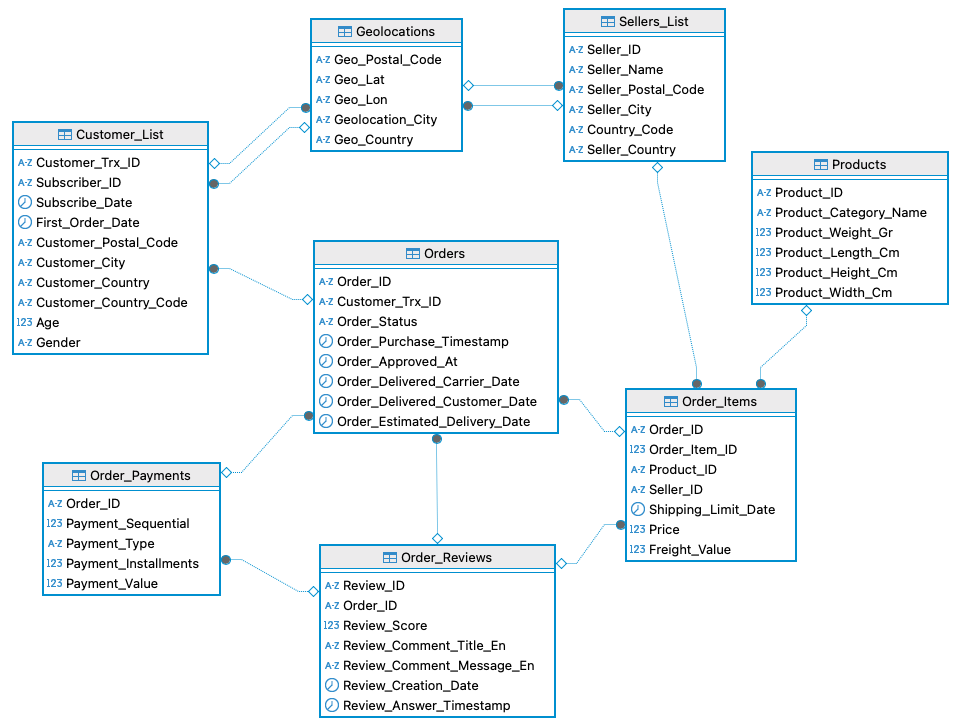

# I. Customer List

In [52]:
df_cus_ls = dfs_org["Customer_List"]
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Customer_List.csv"

quick_check = utils.quick_overview_data(df_cus_ls, csv_path, open_browser=False)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:03<00:00,  3.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Report saved to ./Data_Report\Customer_List.html


{'file_name': 'Customer_List',
 'shape': (102727, 10),
 'columns': ['Customer_Trx_ID',
  'Subscriber_ID',
  'Subscribe_Date',
  'First_Order_Date',
  'Customer_Postal_Code',
  'Customer_City',
  'Customer_Country',
  'Customer_Country_Code',
  'Age',
  'Gender'],
 'dtypes': {'Customer_Trx_ID': dtype('O'),
  'Subscriber_ID': dtype('O'),
  'Subscribe_Date': dtype('O'),
  'First_Order_Date': dtype('O'),
  'Customer_Postal_Code': dtype('O'),
  'Customer_City': dtype('O'),
  'Customer_Country': dtype('O'),
  'Customer_Country_Code': dtype('O'),
  'Age': dtype('int64'),
  'Gender': dtype('O')}}

In [53]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = ['Customer_Trx_ID', 'First_Order_Date']

check_null_overlap = utils.check_null_overlap(df_cus_ls, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Customer_Trx_ID: 3286 nulls
 - First_Order_Date: 3286 nulls

📊 Checking if nulls occur in the same rows:
[V] All columns have nulls in the same rows.


In [54]:
# So if both columns are NULL, it very likely means:
# 🟡 This customer has not placed any orders yet.

df_cus_ls["Customer_Trx_ID"] = df_cus_ls["Customer_Trx_ID"].fillna("No Order")
df_cus_ls["First_Order_Date"] = df_cus_ls["First_Order_Date"].fillna("2099-12-31")

In [55]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = ['Customer_Trx_ID', 'First_Order_Date']

check_null_overlap = utils.check_null_overlap(df_cus_ls, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Customer_Trx_ID: 0 nulls
 - First_Order_Date: 0 nulls

📊 Checking if nulls occur in the same rows:
[V] All columns have nulls in the same rows.


In [56]:
df_cus_ls = utils.check_duplicates(df_cus_ls, columns_to_check)
df_cus_ls

🔍 Duplicate Rows based on data: 3285 duplicates found.
Duplicates found and will be removed:
       Customer_Trx_ID                     Subscriber_ID Subscribe_Date  \
99441         No Order  0e0c08e088ec486e8784aefba35e17bc     2022-11-13   
99442         No Order  3ef786f65f114a27880ecdde737c638f     2023-06-12   
99443         No Order  2999799cc1a846b08098320f5aa3d8ad     2023-02-01   
99444         No Order  ed86c09317f34e209d497d04e3f84504     2024-08-22   
99445         No Order  a76544aba7844c7db3b1ab9bdcd7954e     2023-10-22   
...                ...                               ...            ...   
102722        No Order  fb53848e076b4863a0e3ce0750bde66e     2024-09-14   
102723        No Order  40ed38022bce40ad9f79dd1b53a2499b     2023-03-27   
102724        No Order  ef33bf0a9b1742a3a0944fb603e81c06     2024-09-17   
102725        No Order  abb296dcaa8f4961a6ea6681eff35e2c     2024-09-02   
102726        No Order  c2c686d021ed446cb0bb13552b85052f     2023-11-17   

      

,Customer_Trx_ID,Subscriber_ID,Subscribe_Date,First_Order_Date,Customer_Postal_Code,Customer_City,Customer_Country,Customer_Country_Code,Age,Gender
0,1e959e1f5920cba43823fa9f95673b83,9765e039028279fd2e60bb620a451526,2023-07-08,2023-07-09,FR-75005,Paris,France,FR,29,Male
1,9877437582f263da7d7e30a90c57b8bb,a75e134e7eb6f96e2b0c716ac2a82efb,2024-03-23,2024-04-11,PL-00-001,Warsaw,Poland,PL,38,Male
2,fa6fbbb2080646acae977bf2e44af98b,2fdac27295500e820e43910e9a0aa8d8,2023-05-12,2023-06-01,NL-1012,Amsterdam,Netherlands,NL,35,Female
3,a4c9ff14ae7620126461ca55f36a76ea,e9ab8fd8ea96c85be2714c7f573fb7cd,2023-04-16,2023-04-26,IT-00144,Rome,Italy,IT,62,Male
4,93d5e378ae2f72a07db704f1f6716a7e,6384e6a7b021717616f25625b4bb0bf9,2023-05-26,2023-06-27,NL-1011,Amsterdam,Netherlands,NL,19,Male
...,...,...,...,...,...,...,...,...,...,...
99437,f4a2e155eff15f4fd20947ab24b86cc1,30260bec6bfe6eacffa19e1ae6b7adbd,2023-03-29,2023-03-29,NL-7514,Enschede,Netherlands,NL,45,Female
99438,bd46ef0523578ea078328cf1e798a4b9,1e12dc75b27b5035188bcc5f7d15ca2e,2024-01-08,2024-02-05,DE-10115,Berlin,Germany,DE,45,Male
99439,db68bc0ec210aa334d85a4360e045cdf,6351fc41693a8af0542b0f91b983df99,2024-04-01,2024-06-11,DE-10117,Berlin,Germany,DE,59,Male
99440,684c85fb35942a14af3a594427026a8d,44e362ab816997af40db8f23b2b82cc6,2023-12-12,2023-12-20,FR-13002,Marseille,France,FR,24,Female


## 1.1 EDA

In [57]:
# Step 2: Convert to datetime
df_cus_ls['Subscribe_Date'] = pd.to_datetime(df_cus_ls['Subscribe_Date'])
df_cus_ls['First_Order_Date'] = pd.to_datetime(df_cus_ls['First_Order_Date'])

# Step 3: Identify customers who have placed an order
df_cus_ls['Has_Ordered'] = df_cus_ls['Customer_Trx_ID'] != "No Order"

# Step 4: Calculate the number of days since subscription (using max date in dataset)
max_date = df_cus_ls['Subscribe_Date'].max()
df_cus_ls['Days_Since_Subscription'] = (max_date - df_cus_ls['Subscribe_Date']).dt.days

# Step 5: Segment the dataset
ordered_df = df_cus_ls[df_cus_ls['Has_Ordered'] == True]
non_ordered_df = df_cus_ls[df_cus_ls['Has_Ordered'] == False]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15508\1970691892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus_ls['Subscribe_Date'] = pd.to_datetime(df_cus_ls['Subscribe_Date'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15508\1970691892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus_ls['First_Order_Date'] = pd.to_datetime(df_cus_ls['First_Order_Date'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15508\1970691892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15508\3506634191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus_ls['Subscribe_Month'] = df_cus_ls['Subscribe_Date'].dt.to_period('M').astype(str)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15508\3506634191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_orders['Order_Month'] = valid_orders['First_Order_Date'].dt.to_period('M').astype(str)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15508\3506634191.py:50: SettingWithCopyWarning: 
A value is 

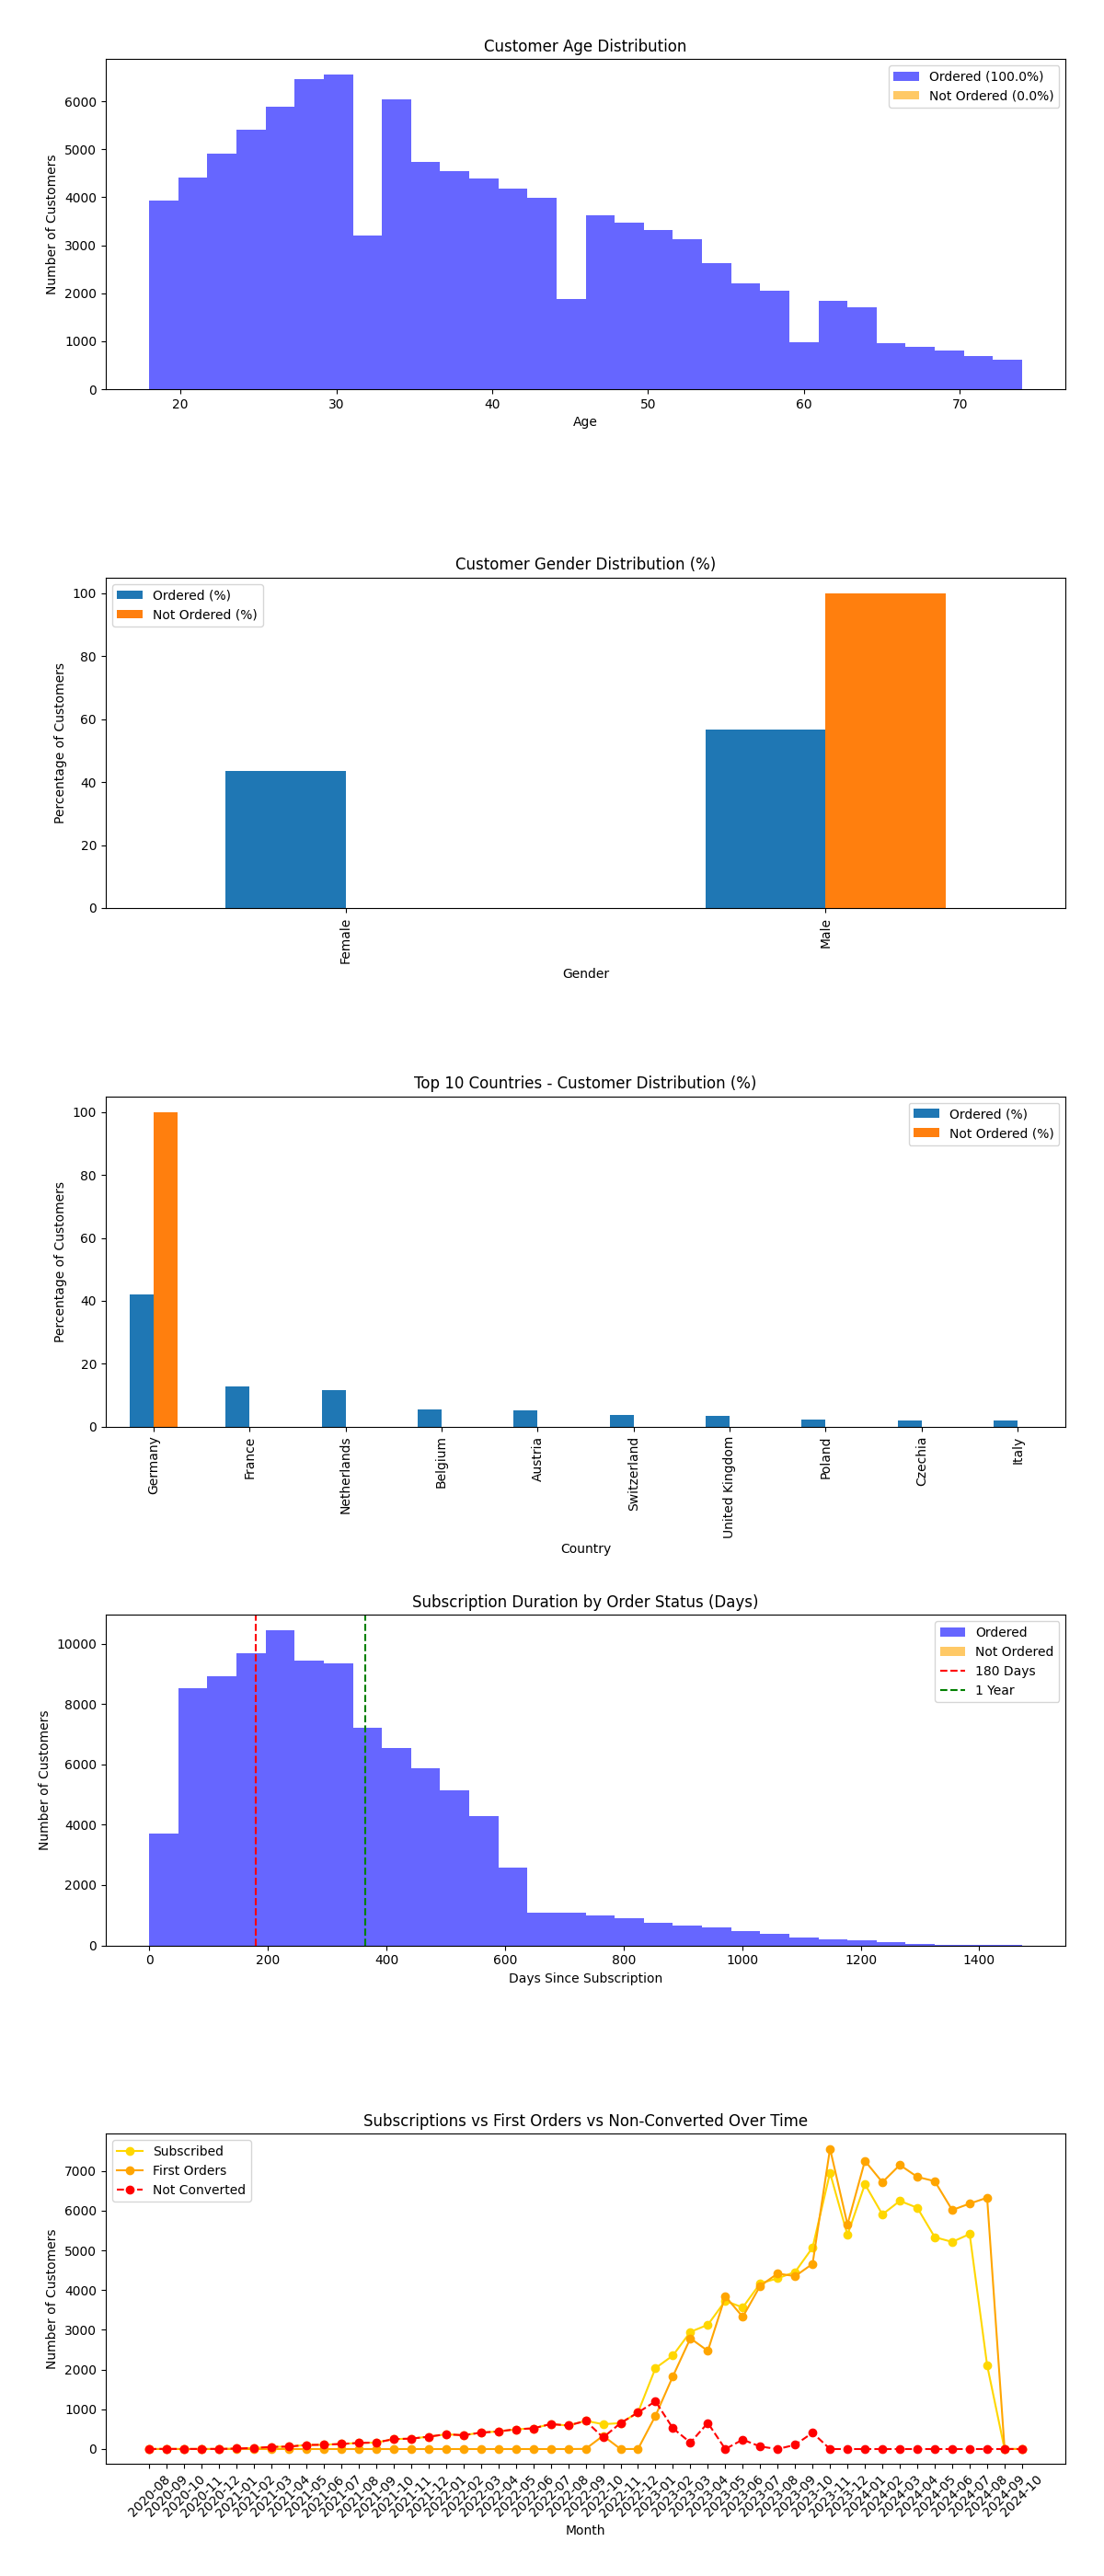

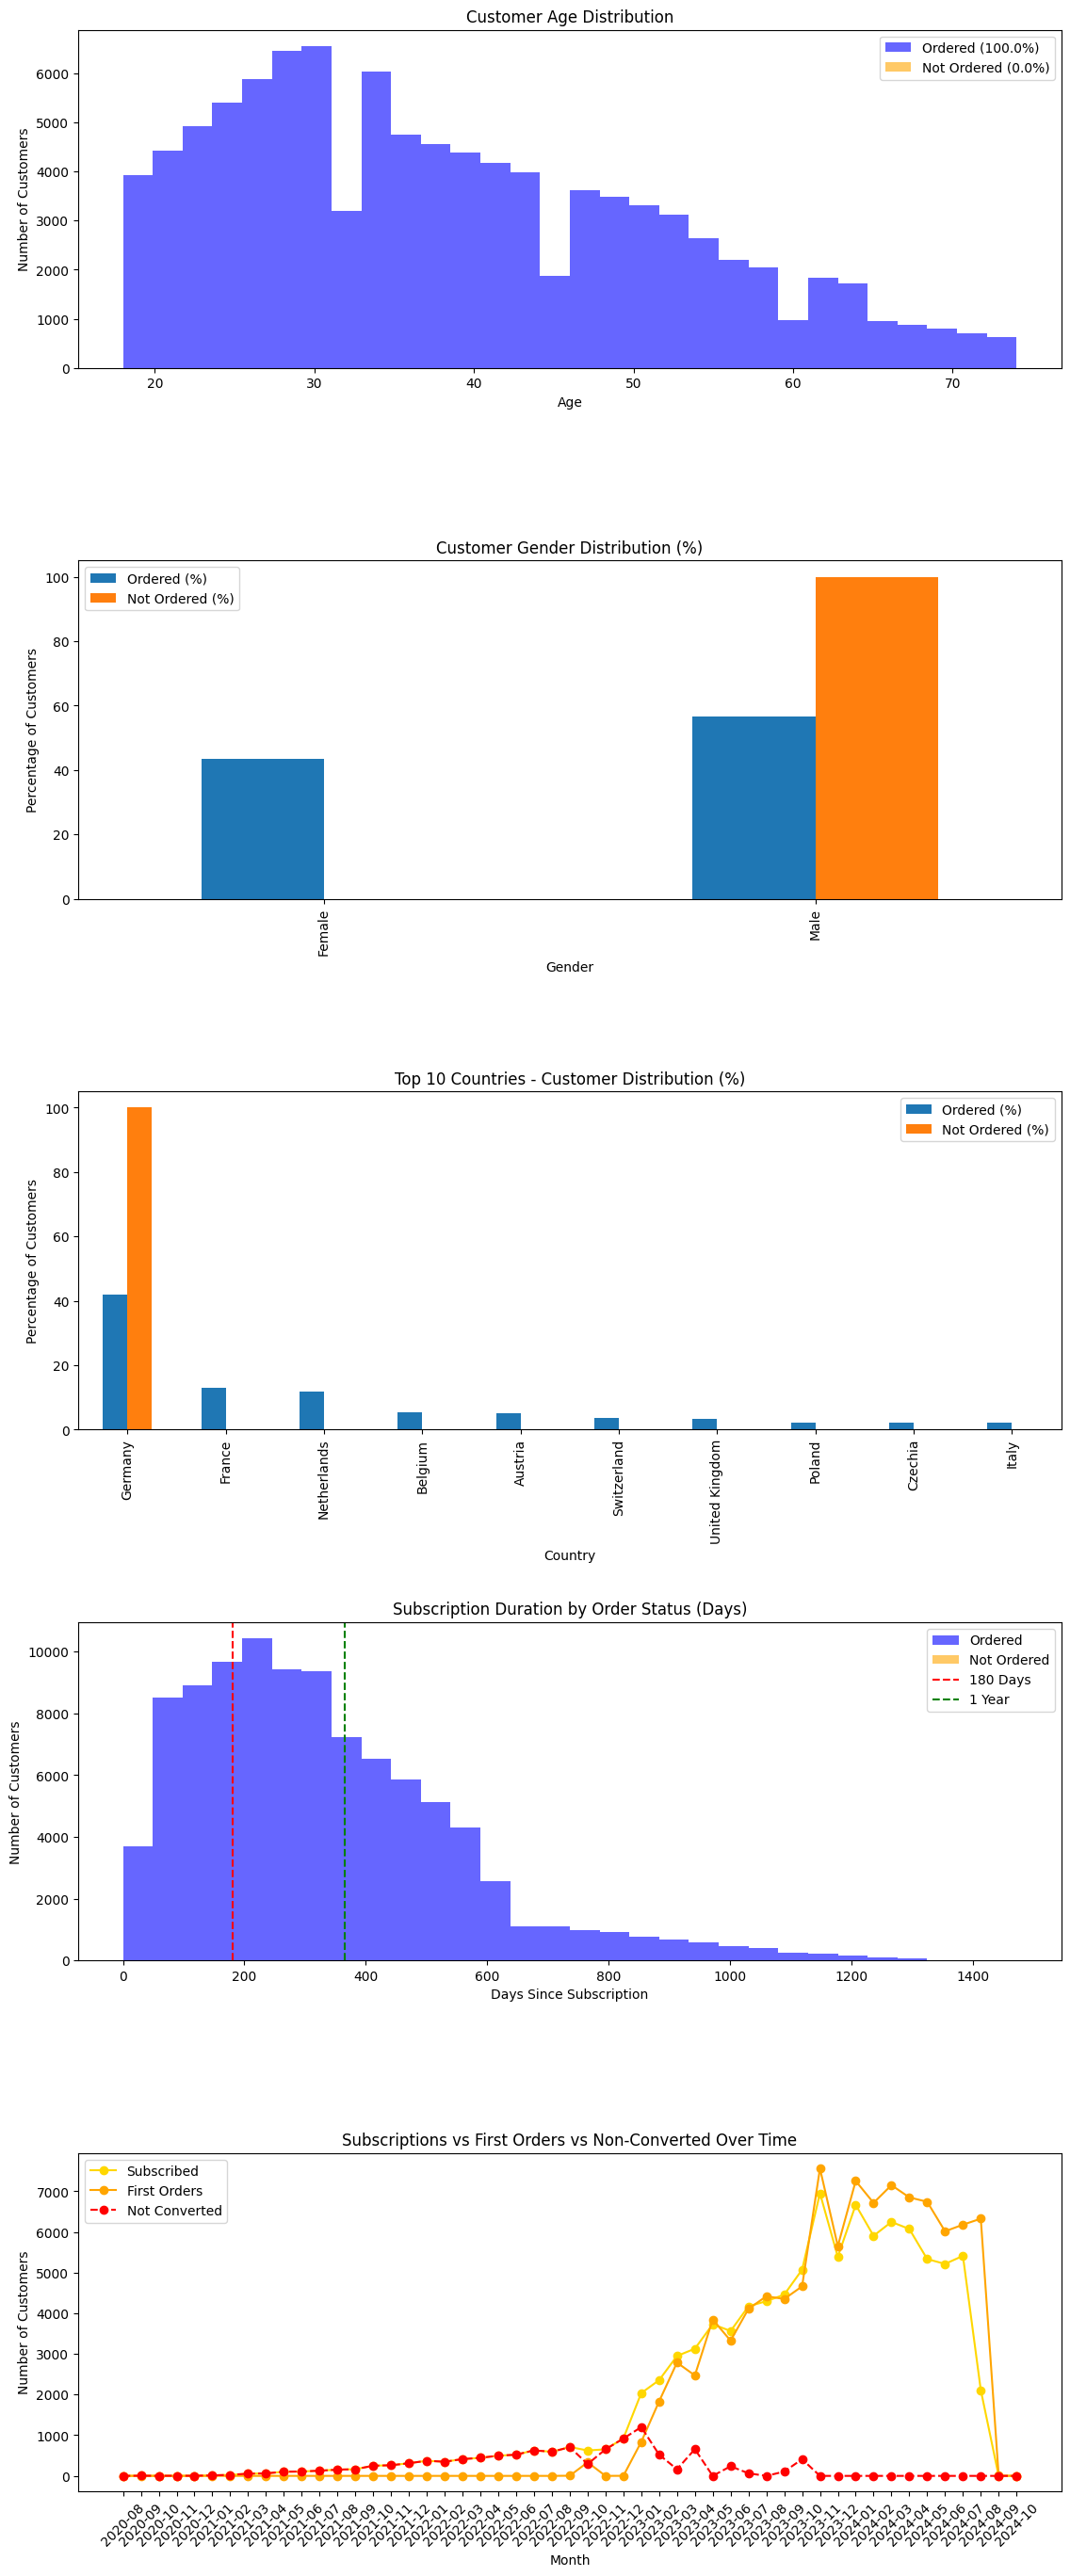

In [58]:
# 1. Recompute time series aggregates:
# Subscription month counts
df_cus_ls['Subscribe_Month'] = df_cus_ls['Subscribe_Date'].dt.to_period('M').astype(str)
subscribe_counts = df_cus_ls.groupby('Subscribe_Month').size()

# First order month counts (excluding placeholder dates)
valid_orders = df_cus_ls[df_cus_ls['First_Order_Date'] < pd.to_datetime("2099-01-01")]
valid_orders['Order_Month'] = valid_orders['First_Order_Date'].dt.to_period('M').astype(str)
order_counts = valid_orders.groupby('Order_Month').size()

# Create unified timeline index
timeline = sorted(set(subscribe_counts.index).union(order_counts.index))
subscribe_counts = subscribe_counts.reindex(timeline, fill_value=0)
order_counts = order_counts.reindex(timeline, fill_value=0)

# Compute non-converted series
non_converted = subscribe_counts - order_counts
non_converted = non_converted.clip(lower=0)

# 2. Build combined figure with 5 subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 28))

# A. Age distribution
axs[0].hist(ordered_df['Age'], bins=30, alpha=0.6, label=f'Ordered ({len(ordered_df)/len(df_cus_ls):.1%})', color='blue')
axs[0].hist(non_ordered_df['Age'], bins=30, alpha=0.6, label=f'Not Ordered ({len(non_ordered_df)/len(df_cus_ls):.1%})', color='orange')
axs[0].set_title('Customer Age Distribution')
axs[0].set_xlabel('Age'); axs[0].set_ylabel('Number of Customers'); axs[0].legend()

# B. Gender distribution (%)
gender_df = pd.DataFrame({
    'Ordered (%)': ordered_df['Gender'].value_counts(normalize=True) * 100,
    'Not Ordered (%)': non_ordered_df['Gender'].value_counts(normalize=True) * 100
}).fillna(0)
gender_df.plot(kind='bar', ax=axs[1])
axs[1].set_title('Customer Gender Distribution (%)')
axs[1].set_xlabel('Gender'); axs[1].set_ylabel('Percentage of Customers')

# C. Country distribution (%)
top_countries = df_cus_ls['Customer_Country'].value_counts().head(10).index
country_df = pd.DataFrame({
    'Ordered (%)': ordered_df['Customer_Country'].value_counts(normalize=True).reindex(top_countries).fillna(0) * 100,
    'Not Ordered (%)': non_ordered_df['Customer_Country'].value_counts(normalize=True).reindex(top_countries).fillna(0) * 100
})
country_df.plot(kind='bar', ax=axs[2])
axs[2].set_title('Top 10 Countries - Customer Distribution (%)')
axs[2].set_xlabel('Country'); axs[2].set_ylabel('Percentage of Customers')

# D. Subscription duration distribution
max_date = df_cus_ls['Subscribe_Date'].max()
df_cus_ls['Days_Since_Subscription'] = (max_date - df_cus_ls['Subscribe_Date']).dt.days
axs[3].hist(df_cus_ls[df_cus_ls['Has_Ordered']]['Days_Since_Subscription'], bins=30, alpha=0.6, label='Ordered', color='blue')
axs[3].hist(df_cus_ls[~df_cus_ls['Has_Ordered']]['Days_Since_Subscription'], bins=30, alpha=0.6, label='Not Ordered', color='orange')
axs[3].axvline(180, color='red', linestyle='--', label='180 Days'); axs[3].axvline(365, color='green', linestyle='--', label='1 Year')
axs[3].set_title('Subscription Duration by Order Status (Days)')
axs[3].set_xlabel('Days Since Subscription'); axs[3].set_ylabel('Number of Customers'); axs[3].legend()

# E. Time series conversion gap
axs[4].plot(timeline, subscribe_counts, marker='o', label='Subscribed', color='gold')
axs[4].plot(timeline, order_counts, marker='o', label='First Orders', color='orange')
axs[4].plot(timeline, non_converted, marker='o', label='Not Converted', color='red', linestyle='--')
axs[4].set_title('Subscriptions vs First Orders vs Non-Converted Over Time')
axs[4].set_xlabel('Month'); axs[4].set_ylabel('Number of Customers')
axs[4].legend(); axs[4].tick_params(axis='x', rotation=45)

fig.tight_layout(pad=3.0)
output_path = "Image/EDA_Customer_List.png"
fig.savefig(output_path)
display(Image(filename=output_path))

**Key Insights**  
1. **Demographics Are Not the Driver**  
   - Age, gender and country distributions are nearly identical between purchasers and non‑purchasers.  
   - Therefore, targeting by basic demographics won’t move the needle on conversion.

2. **Subscription-to‑Purchase Timeline**  
   - First orders predominantly occur **150–350 days** after signup (median ~250 days).  
   - Non‑purchasers peak in the **first 0–60 days**—they simply haven’t had enough time to convert yet.  
   - After **11–12 months**, very few additional conversions happen.

3. **Monthly Conversion “Lag”**  
   - Spikes in signups (yellow) create temporary peaks in “not converted” (red) before first orders catch up.  
   - Those red peaks aren’t permanent churn—they reflect the **natural delay** between signup and order.

---

**Conclusions**  
- **Onboarding and nurturing** must be a **longer‑term process**, not a one‑week campaign.  
- The critical window to **educate, engage and incentivize** new users spans **3–12 months**.  
- Simple demographic segmentation won’t improve conversion; focus on **recency** and **engagement behavior**.

# II. Geolocations

In [59]:
df_geo = dfs_org["Geolocations"]
df_geo.head()

,Geo_Postal_Code,Geo_Lat,Geo_Lon,Geolocation_City,Geo_Country
0,NL-5211,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
1,NL-5212,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
2,NL-5213,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
3,NL-5214,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
4,NL-5215,"51,7000","5,3167",'s-Hertogenbosch,Netherlands


In [60]:
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Fecom Inc Geolocations.csv"
quick_check = utils.quick_overview_data(df_geo, csv_path, open_browser=True)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'Fecom Inc Geolocations',
 'shape': (1000163, 5),
 'columns': ['Geo_Postal_Code',
  'Geo_Lat',
  'Geo_Lon',
  'Geolocation_City',
  'Geo_Country'],
 'dtypes': {'Geo_Postal_Code': dtype('O'),
  'Geo_Lat': dtype('O'),
  'Geo_Lon': dtype('O'),
  'Geolocation_City': dtype('O'),
  'Geo_Country': dtype('O')}}

In [61]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = df_geo.columns.tolist()

check_null_overlap = utils.check_null_overlap(df_geo, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Geo_Postal_Code: 998478 nulls
 - Geo_Lat: 998478 nulls
 - Geo_Lon: 998478 nulls
 - Geolocation_City: 998478 nulls
 - Geo_Country: 998478 nulls

📊 Checking if nulls occur in the same rows:
[V] All columns have nulls in the same rows.


In [62]:
df_geo = utils.check_duplicates(df_geo, columns_to_check)
df_geo

🔍 Duplicate Rows based on data: 998477 duplicates found.
Duplicates found and will be removed:
        Geo_Postal_Code Geo_Lat Geo_Lon Geolocation_City Geo_Country
1685                NaN     NaN     NaN              NaN         NaN
1686                NaN     NaN     NaN              NaN         NaN
1687                NaN     NaN     NaN              NaN         NaN
1688                NaN     NaN     NaN              NaN         NaN
1689                NaN     NaN     NaN              NaN         NaN
...                 ...     ...     ...              ...         ...
1000158             NaN     NaN     NaN              NaN         NaN
1000159             NaN     NaN     NaN              NaN         NaN
1000160             NaN     NaN     NaN              NaN         NaN
1000161             NaN     NaN     NaN              NaN         NaN
1000162             NaN     NaN     NaN              NaN         NaN

[998478 rows x 5 columns]
Duplicates removed.


,Geo_Postal_Code,Geo_Lat,Geo_Lon,Geolocation_City,Geo_Country
0,NL-5211,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
1,NL-5212,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
2,NL-5213,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
3,NL-5214,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
4,NL-5215,"51,7000","5,3167",'s-Hertogenbosch,Netherlands
...,...,...,...,...,...
1681,NL-8012,"52,5167","6,1000",Zwolle,Netherlands
1682,NL-8013,"52,5167","6,1000",Zwolle,Netherlands
1683,NL-8014,"52,5167","6,1000",Zwolle,Netherlands
1684,NL-8015,"52,5167","6,1000",Zwolle,Netherlands


## 2.1 EDA

In [63]:
# Data cleaning
df = df_geo.dropna(subset=['Geo_Postal_Code', 'Geo_Lat', 'Geo_Lon', 'Geolocation_City', 'Geo_Country']).copy()
df['Geo_Lat'] = df['Geo_Lat'].str.replace(',', '.').astype(float)
df['Geo_Lon'] = df['Geo_Lon'].str.replace(',', '.').astype(float)
df['Geolocation_City'] = df['Geolocation_City'].str.strip().str.strip("'")

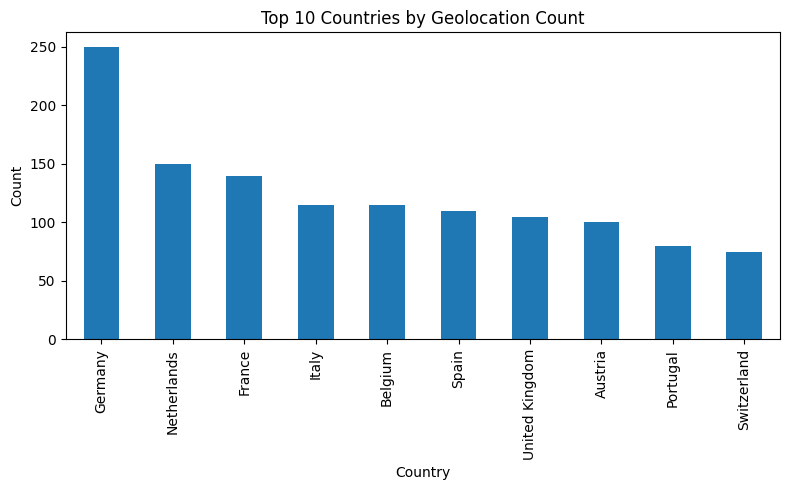

In [64]:
# Bar chart: Top 10 countries
top_countries = df['Geo_Country'].value_counts().head(10)
plt.figure(figsize=(8, 5))
top_countries.plot.bar()
plt.title("Top 10 Countries by Geolocation Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

- **Bar chart** shows the Top 10 countries with the highest number of geolocation points.  
- **Preliminary insight**: The dataset contains 1,685 valid locations, primarily across Europe (Germany, Netherlands, France, Belgium, Italy…). For deeper analysis (e.g., a heatmap on an interactive map), you can take this subset and integrate it with mapping libraries like Folium or GeoPandas.


# III. Order Items

In [65]:
df_Order_Items = dfs_org["Order_Items"]
df_Order_Items.head()

,Order_ID,Order_Item_ID,Product_ID,Seller_ID,Shipping_Limit_Date,Price,Freight_Value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2023-09-19 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2023-05-03 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2024-01-18 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2024-08-15 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2023-02-13 13:57,199.90,18.14


In [66]:
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Fecom Inc Order Items.csv"
quick_check = utils.quick_overview_data(df_Order_Items, csv_path, open_browser=True)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:02<00:00,  2.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'Fecom Inc Order Items',
 'shape': (112650, 7),
 'columns': ['Order_ID',
  'Order_Item_ID',
  'Product_ID',
  'Seller_ID',
  'Shipping_Limit_Date',
  'Price',
  'Freight_Value'],
 'dtypes': {'Order_ID': dtype('O'),
  'Order_Item_ID': dtype('int64'),
  'Product_ID': dtype('O'),
  'Seller_ID': dtype('O'),
  'Shipping_Limit_Date': dtype('O'),
  'Price': dtype('float64'),
  'Freight_Value': dtype('float64')}}

In [67]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = df_Order_Items.columns.tolist()

check_null_overlap = utils.check_null_overlap(df_Order_Items, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Order_ID: 0 nulls
 - Order_Item_ID: 0 nulls
 - Product_ID: 0 nulls
 - Seller_ID: 0 nulls
 - Shipping_Limit_Date: 0 nulls
 - Price: 0 nulls
 - Freight_Value: 0 nulls

📊 Checking if nulls occur in the same rows:
[V] All columns have nulls in the same rows.


In [68]:
df_Order_Items = utils.check_duplicates(df_Order_Items, columns_to_check)
df_Order_Items

🔍 Duplicate Rows based on data: 0 duplicates found.
No duplicates found. Data is clean.


,Order_ID,Order_Item_ID,Product_ID,Seller_ID,Shipping_Limit_Date,Price,Freight_Value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2023-09-19 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2023-05-03 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2024-01-18 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2024-08-15 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2023-02-13 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2024-05-02 04:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2024-07-20 04:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2023-10-30 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2023-08-21 00:04,55.99,8.72


## 3.1 EDA

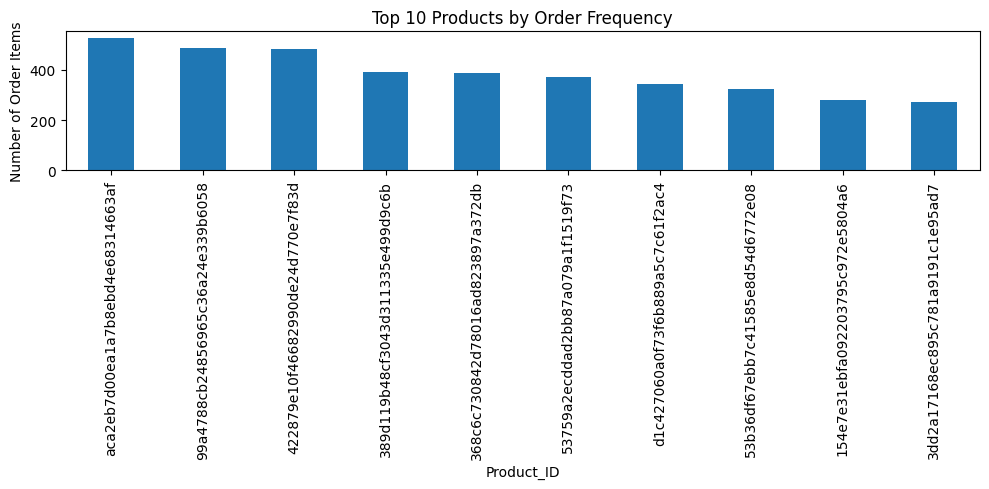

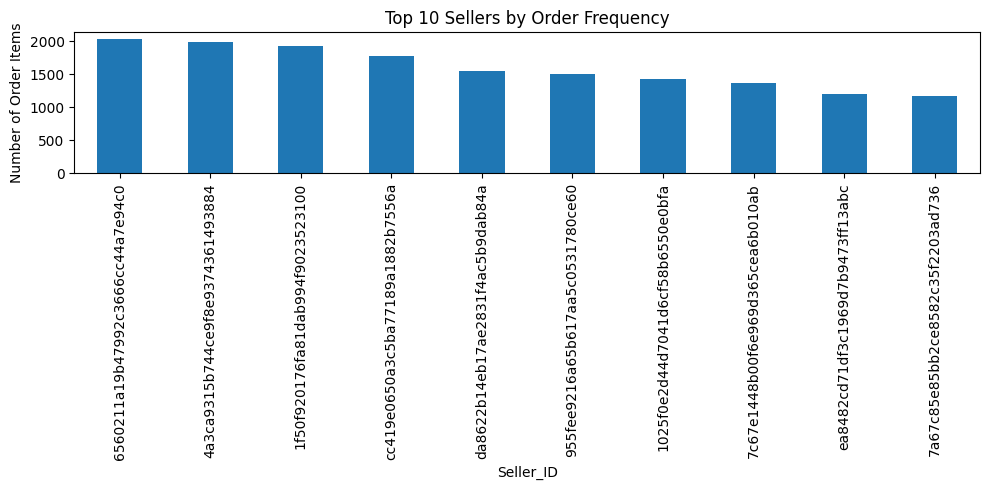

In [69]:
# Top 10 Products by order count
top_products = df_Order_Items['Product_ID'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_products.plot.bar()
plt.title('Top 10 Products by Order Frequency')
plt.xlabel('Product_ID')
plt.ylabel('Number of Order Items')
plt.tight_layout()
plt.show()

# Top 10 Sellers by order count
top_sellers = df_Order_Items['Seller_ID'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_sellers.plot.bar()
plt.title('Top 10 Sellers by Order Frequency')
plt.xlabel('Seller_ID')
plt.ylabel('Number of Order Items')
plt.tight_layout()
plt.show()

**Insights:**

- **Top 10 Products by Order Frequency**  
  - The top 10 most ordered `Product_ID`s account for only **3.44%** of all order items (3,873 out of 112,650), indicating that customer demand is **highly diversified**.
  - The highest-frequency product (`aca2eb7d00ea1a7b8ebd4e68314663af`) appears **527 times**, making up around **0.47%** of the dataset.

- **Top 10 Sellers by Order Frequency**  
  - The top 10 `Seller_ID`s collectively handle **14.15%** of all order items (15,942 out of 112,650), showing that **order volume is more concentrated** among leading sellers.
  - The most active seller (`6560211a19b47992c3666cc44a7e94c0`) fulfilled **2,033** order items (~**1.80%**).

**Conclusion:**  
- On the **product side**, demand is spread out across many different items, which suggests customers have diverse preferences.  
- On the **seller side**, a relatively small group of sellers dominates a significant portion of order fulfillment, indicating potential opportunities for partnership, performance tracking, or preferential programs.


# IV. Order Payments

In [70]:
df_Order_Payments = dfs_org["Order_Payments"]
df_Order_Payments.head()

,Order_ID,Payment_Sequential,Payment_Type,Payment_Installments,Payment_Value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [71]:
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Fecom Inc Order Payments.csv"
quick_check = utils.quick_overview_data(df_Order_Payments, csv_path, open_browser=True)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'Fecom Inc Order Payments',
 'shape': (103886, 5),
 'columns': ['Order_ID',
  'Payment_Sequential',
  'Payment_Type',
  'Payment_Installments',
  'Payment_Value'],
 'dtypes': {'Order_ID': dtype('O'),
  'Payment_Sequential': dtype('int64'),
  'Payment_Type': dtype('O'),
  'Payment_Installments': dtype('int64'),
  'Payment_Value': dtype('float64')}}

In [72]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = df_Order_Payments.columns.tolist()

check_null_overlap = utils.check_null_overlap(df_Order_Payments, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Order_ID: 0 nulls
 - Payment_Sequential: 0 nulls
 - Payment_Type: 0 nulls
 - Payment_Installments: 0 nulls
 - Payment_Value: 0 nulls

📊 Checking if nulls occur in the same rows:
[V] All columns have nulls in the same rows.


In [73]:
df_Order_Payments = utils.check_duplicates(df_Order_Payments, columns_to_check)
df_Order_Payments

🔍 Duplicate Rows based on data: 0 duplicates found.
No duplicates found. Data is clean.


,Order_ID,Payment_Sequential,Payment_Type,Payment_Installments,Payment_Value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,debit_card,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


## 4.1 EDA

   Payment_Type  Count    Percent  Avg_Payment_Value  Share_Installments_gt1_%
0   credit_card  76795  73.922376         163.319021                 66.850706
1    debit_card  19784  19.043952         145.034435                  0.000000
2       voucher   5775   5.558978           0.000000                  0.000000
3  prepaid_card   1529   1.471806         142.570170                  0.000000
4   not_defined      3   0.002888          65.703354                  0.000000
Hệ số tương quan (installments vs payment value): 0.331


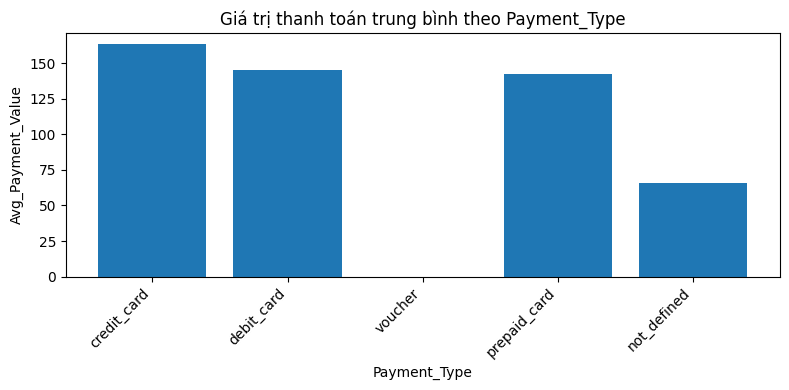

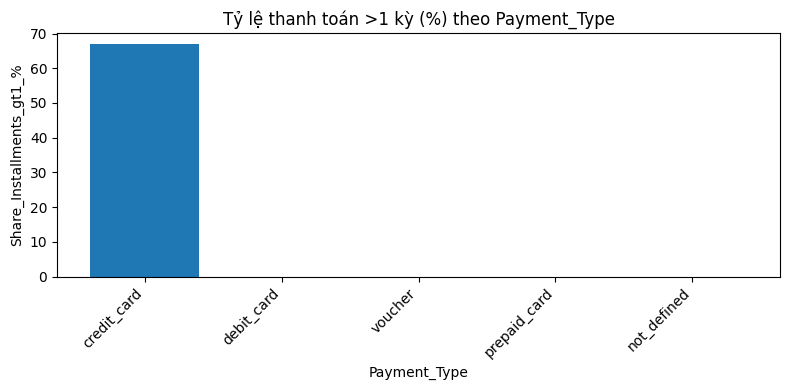

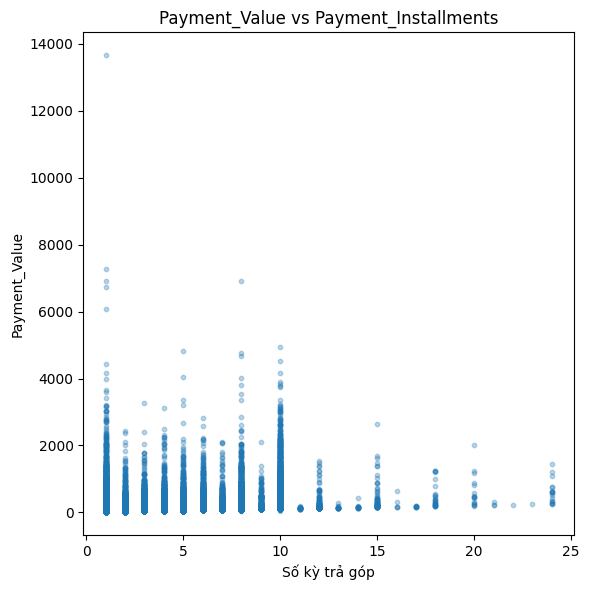

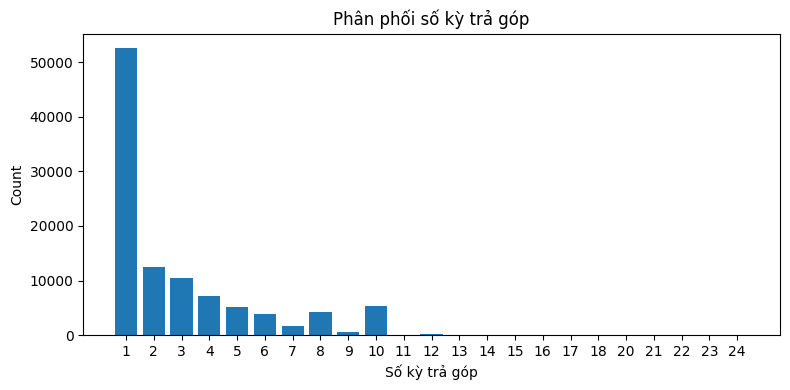

In [74]:
# 2) Tóm tắt theo Payment_Type
df_summary = pd.DataFrame({
    'Payment_Type': df_Order_Payments['Payment_Type'].value_counts().index,
    'Count':          df_Order_Payments['Payment_Type'].value_counts().values,
    'Percent':        df_Order_Payments['Payment_Type'].value_counts(normalize=True).values * 100,
    'Avg_Payment_Value':
        df_Order_Payments.groupby('Payment_Type')['Payment_Value'].mean().values,
    'Share_Installments_gt1_%':
        df_Order_Payments.assign(flag=df_Order_Payments['Payment_Installments']>1)
              .groupby('Payment_Type')['flag']
              .mean().values * 100
})

print(df_summary)

# 3) Tính hệ số tương quan
corr = df_Order_Payments['Payment_Installments'].corr(df_Order_Payments['Payment_Value'])
print(f"Hệ số tương quan (installments vs payment value): {corr:.3f}")

# 4) Chart 1: Giá trị thanh toán trung bình theo Payment_Type
plt.figure(figsize=(8,4))
plt.bar(df_summary['Payment_Type'], df_summary['Avg_Payment_Value'])
plt.title('Giá trị thanh toán trung bình theo Payment_Type')
plt.xlabel('Payment_Type')
plt.ylabel('Avg_Payment_Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5) Chart 2: Tỷ lệ thanh toán >1 kỳ theo Payment_Type
plt.figure(figsize=(8,4))
plt.bar(df_summary['Payment_Type'], df_summary['Share_Installments_gt1_%'])
plt.title('Tỷ lệ thanh toán >1 kỳ (%) theo Payment_Type')
plt.xlabel('Payment_Type')
plt.ylabel('Share_Installments_gt1_%')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6) Chart 3: Scatter plot – installments vs Payment_Value
plt.figure(figsize=(6,6))
plt.scatter(df_Order_Payments['Payment_Installments'], df_Order_Payments['Payment_Value'],
            s=10, alpha=0.3)
plt.title('Payment_Value vs Payment_Installments')
plt.xlabel('Số kỳ trả góp')
plt.ylabel('Payment_Value')
plt.tight_layout()
plt.show()

# 7) Chart 4: Phân phối số kỳ trả góp
inst_counts = df_Order_Payments['Payment_Installments'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(inst_counts.index.astype(str), inst_counts.values)
plt.title('Phân phối số kỳ trả góp')
plt.xlabel('Số kỳ trả góp')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights:**

- **Payment methods share:** credit_card (73.9%), debit_card (19.0%), voucher (5.6%), prepaid_card (1.5%), not_defined (≈0%).  
- **Average payment value:** credit_card ≈163.3, debit_card ≈145.0, voucher ≈65.7, prepaid_card ≈142.6. Card payments show higher average ticket than vouchers.  
- **Installment usage:** 66.9% of credit_card transactions use >1 installment; other types have virtually no installments.  
- **Correlation:** r ≈0.331 between number of installments and payment value, indicating higher‑value orders are more likely to be split.  
- **Installment distribution:** ~50.6% single payment, ~11.0% two installments, ~9.3% three, ~6.8% four, and tapering off to ~0.6% for ten installments.  
- **Actionable takeaways:**  
  - Promote 0%‑interest installment plans for credit_card users to boost average order value.  
  - Expand voucher/prepaid_card incentives to drive volume in lower‑value segments.  
  - Monitor installment trends over time (add order date) to measure campaign impact.


# V. Order_Reviews_No_Emojis

In [75]:
df_Reviews_No_Emojis = dfs_org["Order_Reviews_No_Emojis"]
df_Reviews_No_Emojis.head()

,Review_ID,Order_ID,Review_Score,Review_Comment_Title_En,Review_Comment_Message_En,Review_Creation_Date,Review_Answer_Timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2024-01-18 00:00,2024-01-18 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2024-03-10 00:00,2024-03-11 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2024-02-17 00:00,2024-02-18 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,I received it well before the stipulated deadl...,2023-04-21 00:00,2023-04-21 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,"Congratulations lannister stores, I loved shop...",2024-03-01 00:00,2024-03-02 10:26


In [76]:
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Fecom Inc Order Reviews No Emojis.csv"
quick_check = utils.quick_overview_data(df_Reviews_No_Emojis, csv_path, open_browser=True)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:05<00:00,  1.30it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'Fecom Inc Order Reviews No Emojis',
 'shape': (99223, 7),
 'columns': ['Review_ID',
  'Order_ID',
  'Review_Score',
  'Review_Comment_Title_En',
  'Review_Comment_Message_En',
  'Review_Creation_Date',
  'Review_Answer_Timestamp'],
 'dtypes': {'Review_ID': dtype('O'),
  'Order_ID': dtype('O'),
  'Review_Score': dtype('int64'),
  'Review_Comment_Title_En': dtype('O'),
  'Review_Comment_Message_En': dtype('O'),
  'Review_Creation_Date': dtype('O'),
  'Review_Answer_Timestamp': dtype('O')}}

In [77]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = df_Reviews_No_Emojis.columns.tolist()

check_null_overlap = utils.check_null_overlap(df_Reviews_No_Emojis, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Review_ID: 0 nulls
 - Order_ID: 0 nulls
 - Review_Score: 0 nulls
 - Review_Comment_Title_En: 87682 nulls
 - Review_Comment_Message_En: 58347 nulls
 - Review_Creation_Date: 0 nulls
 - Review_Answer_Timestamp: 0 nulls

📊 Checking if nulls occur in the same rows:
[X] Nulls do NOT overlap exactly in all columns.

 Rows with partial nulls (mismatch):


,Review_ID,Order_ID,Review_Score,Review_Comment_Title_En,Review_Comment_Message_En,Review_Creation_Date,Review_Answer_Timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2024-01-18 00:00,2024-01-18 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2024-03-10 00:00,2024-03-11 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2024-02-17 00:00,2024-02-18 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,I received it well before the stipulated deadl...,2023-04-21 00:00,2023-04-21 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,"Congratulations lannister stores, I loved shop...",2024-03-01 00:00,2024-03-02 10:26


In [78]:
df_Reviews_No_Emojis = utils.check_duplicates(df_Reviews_No_Emojis, columns_to_check)
df_Reviews_No_Emojis

🔍 Duplicate Rows based on data: 0 duplicates found.
No duplicates found. Data is clean.


,Review_ID,Order_ID,Review_Score,Review_Comment_Title_En,Review_Comment_Message_En,Review_Creation_Date,Review_Answer_Timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2024-01-18 00:00,2024-01-18 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2024-03-10 00:00,2024-03-11 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2024-02-17 00:00,2024-02-18 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,I received it well before the stipulated deadl...,2023-04-21 00:00,2023-04-21 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,"Congratulations lannister stores, I loved shop...",2024-03-01 00:00,2024-03-02 10:26
...,...,...,...,...,...,...,...
99218,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2024-07-07 00:00,2024-07-14 17:18
99219,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2023-12-09 00:00,2023-12-11 20:06
99220,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,NaN,2024-03-22 00:00,2024-03-23 09:10
99221,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2024-07-01 00:00,2024-07-02 12:59


## 5.1 EDA

In [79]:
# 3. Impute text fields
df_Reviews_No_Emojis['Review_Comment_Title_En']   = df_Reviews_No_Emojis['Review_Comment_Title_En'].fillna('No title')
df_Reviews_No_Emojis['Review_Comment_Message_En'] = df_Reviews_No_Emojis['Review_Comment_Message_En'].fillna('No comment')

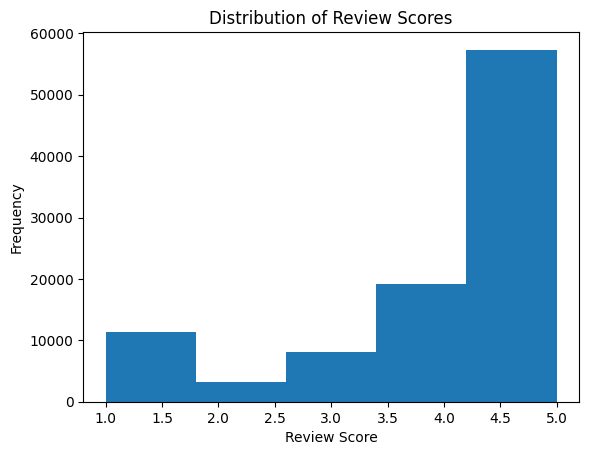

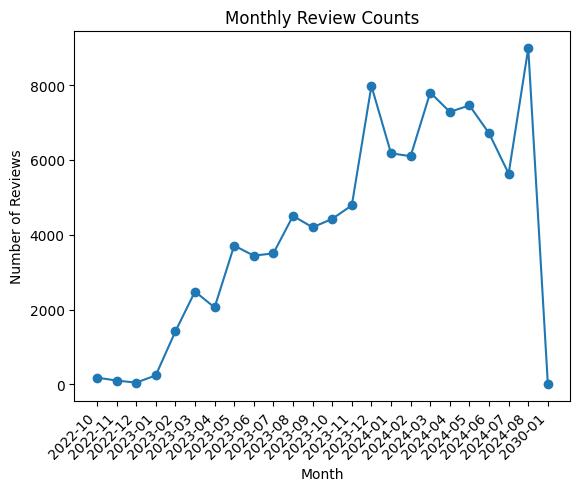

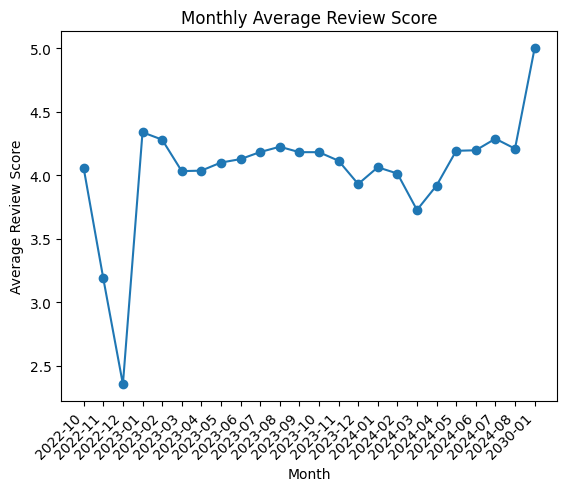

In [80]:
df_Reviews_No_Emojis['Review_Creation_Date'] = pd.to_datetime(df_Reviews_No_Emojis['Review_Creation_Date'], errors='coerce')

# 2. Distribution of Review_Score
plt.figure()
plt.hist(df_Reviews_No_Emojis['Review_Score'].dropna(), bins=5)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

# 3. Monthly aggregations
df_Reviews_No_Emojis['Review_Month'] = df_Reviews_No_Emojis['Review_Creation_Date'].dt.to_period('M')
monthly = df_Reviews_No_Emojis.groupby('Review_Month')['Review_ID'].count().rename('monthly_reviews')
avg_score = df_Reviews_No_Emojis.groupby('Review_Month')['Review_Score'].mean().rename('avg_monthly_score')

# 4. Plot Monthly Review Counts
plt.figure()
plt.plot(monthly.index.astype(str), monthly.values, marker='o')
plt.title('Monthly Review Counts')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. Plot Monthly Average Review Score
plt.figure()
plt.plot(avg_score.index.astype(str), avg_score.values, marker='o')
plt.title('Monthly Average Review Score')
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [81]:
# Count reviews with year 2030
reviews_2030 = df_Reviews_No_Emojis[df_Reviews_No_Emojis['Review_Creation_Date'].dt.year == 2030]
count_2030 = len(reviews_2030)

print(f"Số review có ngày tạo trong năm 2030: {count_2030}")
reviews_2030.head(10)

## traceback using orderid to create real day

Số review có ngày tạo trong năm 2030: 1


,Review_ID,Order_ID,Review_Score,Review_Comment_Title_En,Review_Comment_Message_En,Review_Creation_Date,Review_Answer_Timestamp,Review_Month
26585,8e2b70309d19990e07ee293befd183cb,2326e62a79b6d61d95f414e44724d427,5,No title,"Very good service provided. Fast delivery, con...",2030-01-25,2030-01-26 00:00,2030-01


**Insights & Action Items**

**Distribution of review scores**  
- 5 stars: ~58%  
- 4 stars: ~19%  
- 1 star: ~12%  
- 3 stars: ~8%  
- 2 stars: ~3%  

Action: Maintain high service quality for the majority of satisfied customers, and conduct a root‑cause analysis on the small fraction of 2‑star reviews to identify improvement opportunities.

**Monthly review volume**  
- Low volumes in late 2022, steadily rising to a peak of ~9 200 reviews in August 2024.  

Action: Leverage peak periods for targeted NPS surveys or promotional campaigns to capitalize on elevated customer engagement.

**Monthly average review score**  
- Stable around 4.0–4.3 from January 2023 to mid‑2024.  
- Notable dip to 2.36 in December 2022 (small sample size) and spike to 5.0 in August 2024.  

Action: Audit the August 2024 data for accuracy; if confirmed, investigate underlying factors (e.g., special promotions, new product launch) to replicate success.

**Date/time handling**  
- Parsing timestamps into datetime objects and extracting monthly periods is essential for trend analysis.  
- Consider further breakdowns (day of week, hour of day) to optimize response workflows and timing of customer outreach.

# VI. Products

In [82]:
df_prod = dfs_org["Products"]
df_prod.head()

,Product_ID,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,625.0,20.0,17.0,13.0


In [83]:
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Fecom Inc Products.csv"

quick_check = utils.quick_overview_data(df_prod, csv_path, open_browser=True)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00,  7.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'Fecom Inc Products',
 'shape': (32951, 6),
 'columns': ['Product_ID',
  'Product_Category_Name',
  'Product_Weight_Gr',
  'Product_Length_Cm',
  'Product_Height_Cm',
  'Product_Width_Cm'],
 'dtypes': {'Product_ID': dtype('O'),
  'Product_Category_Name': dtype('O'),
  'Product_Weight_Gr': dtype('float64'),
  'Product_Length_Cm': dtype('float64'),
  'Product_Height_Cm': dtype('float64'),
  'Product_Width_Cm': dtype('float64')}}

In [84]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = df_prod.columns.tolist()

check_null_overlap = utils.check_null_overlap(df_prod, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Product_ID: 0 nulls
 - Product_Category_Name: 623 nulls
 - Product_Weight_Gr: 2 nulls
 - Product_Length_Cm: 2 nulls
 - Product_Height_Cm: 2 nulls
 - Product_Width_Cm: 2 nulls

📊 Checking if nulls occur in the same rows:
[X] Nulls do NOT overlap exactly in all columns.

 Rows with partial nulls (mismatch):


,Product_ID,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,300.0,35.0,7.0,12.0


In [85]:
df_prod = utils.check_duplicates(df_prod, columns_to_check)
df_prod

🔍 Duplicate Rows based on data: 0 duplicates found.
No duplicates found. Data is clean.


,Product_ID,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,700.0,31.0,13.0,20.0


## 6.1 EDA

In [86]:
# 2. Xử lý Product_Category_Name null
mask_null_cat = df_prod['Product_Category_Name'].isnull()
num_null_cat = mask_null_cat.sum()
# Gán lần lượt product_1, product_2, ..., product_n
df_prod.loc[mask_null_cat, 'Product_Category_Name'] = [
    f'product_{i+1}' for i in range(num_null_cat)
]

# 3. Điền mean cho các cột numeric có 2 null
numeric_cols = ['Product_Weight_Gr', 'Product_Length_Cm', 'Product_Height_Cm', 'Product_Width_Cm']
for col in numeric_cols:
    mean_val = df_prod[col].mean()
    df_prod[col].fillna(mean_val, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15508\959078740.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prod[col].fillna(mean_val, inplace=True)


- Check wether the id columns í unique? - check done. unique

# VII. Sellers List

In [87]:
df_sellers = dfs_org["Sellers_List"]
df_sellers.head()

,Seller_ID,Seller_Name,Seller_Postal_Code,Seller_City,Country_Code,Seller_Country
0,d1b65fc7debc3361ea86b5f14c68d2e2,NeuroLabsX,DE-14469,Potsdam,DE,Germany
1,51a04a8a6bdcb23deccc82b0b80742cf,SwiftLabs,DE-6108,Halle (Saale),DE,Germany
2,e49c26c3edfa46d227d5121a6b6e4d37,EcoFutures,ES-33003,Oviedo,ES,Spain
3,1b938a7ec6ac5061a66a3766e0e75f90,HyperHub,DE-6112,Halle (Saale),DE,Germany
4,a7a9b880c49781da66651ccf4ba9ac38,EliteAI,DE-18069,Rostock,DE,Germany


In [88]:
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Fecom Inc Sellers List.csv"

quick_check = utils.quick_overview_data(df_sellers, csv_path, open_browser=True)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 22.81it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'Fecom Inc Sellers List',
 'shape': (3095, 6),
 'columns': ['Seller_ID',
  'Seller_Name',
  'Seller_Postal_Code',
  'Seller_City',
  'Country_Code',
  'Seller_Country'],
 'dtypes': {'Seller_ID': dtype('O'),
  'Seller_Name': dtype('O'),
  'Seller_Postal_Code': dtype('O'),
  'Seller_City': dtype('O'),
  'Country_Code': dtype('O'),
  'Seller_Country': dtype('O')}}

In [89]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = df_sellers.columns.tolist()

check_null_overlap = utils.check_null_overlap(df_sellers, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Seller_ID: 0 nulls
 - Seller_Name: 0 nulls
 - Seller_Postal_Code: 0 nulls
 - Seller_City: 0 nulls
 - Country_Code: 0 nulls
 - Seller_Country: 0 nulls

📊 Checking if nulls occur in the same rows:
[V] All columns have nulls in the same rows.


In [90]:
df_sellers = utils.check_duplicates(df_sellers, columns_to_check)

🔍 Duplicate Rows based on data: 0 duplicates found.
No duplicates found. Data is clean.


# VIII. Order

In [99]:
df_orders = dfs_org["Orders"]
df_orders.head()

,Order_ID,Customer_Trx_ID,Order_Status,Order_Purchase_Timestamp,Order_Approved_At,Order_Delivered_Carrier_Date,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2023-10-02 10:56,2023-10-02 11:07,2023-10-04 19:55,2023-10-10 21:25,2023-10-18 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2024-07-24 20:41,2024-07-26 03:24,2024-07-26 14:31,2024-08-07 15:27,2024-08-13 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2024-08-08 08:38,2024-08-08 08:55,2024-08-08 13:50,2024-08-17 18:06,2024-09-04 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2023-11-18 19:28,2023-11-18 19:45,2023-11-22 13:39,2023-12-02 00:28,2023-12-15 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2024-02-13 21:18,2024-02-13 22:20,2024-02-14 19:46,2024-02-16 18:17,2024-02-26 00:00


In [92]:
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Fecom Inc Orders.csv"

quick_check = utils.quick_overview_data(df_orders, csv_path, open_browser=True)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'Fecom Inc Orders',
 'shape': (99441, 8),
 'columns': ['Order_ID',
  'Customer_Trx_ID',
  'Order_Status',
  'Order_Purchase_Timestamp',
  'Order_Approved_At',
  'Order_Delivered_Carrier_Date',
  'Order_Delivered_Customer_Date',
  'Order_Estimated_Delivery_Date'],
 'dtypes': {'Order_ID': dtype('O'),
  'Customer_Trx_ID': dtype('O'),
  'Order_Status': dtype('O'),
  'Order_Purchase_Timestamp': dtype('O'),
  'Order_Approved_At': dtype('O'),
  'Order_Delivered_Carrier_Date': dtype('O'),
  'Order_Delivered_Customer_Date': dtype('O'),
  'Order_Estimated_Delivery_Date': dtype('O')}}

In [100]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = df_orders.columns.tolist()

check_null_overlap = utils.check_null_overlap(df_orders, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Order_ID: 0 nulls
 - Customer_Trx_ID: 0 nulls
 - Order_Status: 0 nulls
 - Order_Purchase_Timestamp: 0 nulls
 - Order_Approved_At: 160 nulls
 - Order_Delivered_Carrier_Date: 1783 nulls
 - Order_Delivered_Customer_Date: 2965 nulls
 - Order_Estimated_Delivery_Date: 0 nulls

📊 Checking if nulls occur in the same rows:
[X] Nulls do NOT overlap exactly in all columns.

 Rows with partial nulls (mismatch):


,Order_ID,Customer_Trx_ID,Order_Status,Order_Purchase_Timestamp,Order_Approved_At,Order_Delivered_Carrier_Date,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2023-04-11 12:22,2023-04-13 13:25,NaN,NaN,2023-05-09 00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2024-06-04 16:44,2024-06-05 04:31,2024-06-05 14:32,NaN,2024-06-28 00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2024-08-03 17:44,2024-08-07 06:15,NaN,NaN,2024-08-21 00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2023-09-03 14:22,2023-09-03 14:30,NaN,NaN,2023-10-03 00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2024-01-10 11:33,2024-01-11 02:32,2024-01-11 19:39,NaN,2024-02-07 00:00


In [101]:
df_orders = utils.check_duplicates(df_orders, columns_to_check)

🔍 Duplicate Rows based on data: 0 duplicates found.
No duplicates found. Data is clean.


## 8.4 EDA

In [ ]:
df_orders_status = df_orders['Order_Status'].value_counts()
df_orders_status


Order_Status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [102]:
# Kiểm tra lại các cột hiện có trong DataFrame để xác định tên chính xác
df_orders.columns

Index(['Order_ID', 'Customer_Trx_ID', 'Order_Status',
       'Order_Purchase_Timestamp', 'Order_Approved_At',
       'Order_Delivered_Carrier_Date', 'Order_Delivered_Customer_Date',
       'Order_Estimated_Delivery_Date'],
      dtype='object')

In [ ]:
# Convert time-related columns to datetime format to ensure proper time calculations
# Logic: Ensures all timestamp columns are in datetime format for accurate subtraction and manipulation
df_orders['Order_Purchase_Timestamp'] = pd.to_datetime(df_orders['Order_Purchase_Timestamp'])
df_orders['Order_Approved_At'] = pd.to_datetime(df_orders['Order_Approved_At'])
df_orders['Order_Delivered_Carrier_Date'] = pd.to_datetime(df_orders['Order_Delivered_Carrier_Date'])
df_orders['Order_Delivered_Customer_Date'] = pd.to_datetime(df_orders['Order_Delivered_Customer_Date'])
df_orders['Order_Estimated_Delivery_Date'] = pd.to_datetime(df_orders['Order_Estimated_Delivery_Date'])

# 1. Handle Order_Approved_At
# Calculate the average time lag from order placement to approval
# Logic: Compute the time difference between Order_Approved_At and Order_Purchase_Timestamp for non-null records
#        Drop null values to avoid errors and calculate the mean lag
approval_lag = (df_orders['Order_Approved_At'] - df_orders['Order_Purchase_Timestamp']).dropna()
mean_approval_lag = approval_lag.mean()
print(f"Average approval lag: {mean_approval_lag}")

# Define statuses that require filling Order_Approved_At with Purchase_Timestamp + mean_approval_lag
# Logic: These statuses indicate the order has been approved, so we estimate the approval time
approved_statuses = ['approved', 'delivered', 'shipped', 'invoiced', 'processing']

# Fill null values in Order_Approved_At
# Logic: For orders with approved_statuses and null Order_Approved_At, use Purchase_Timestamp + mean_approval_lag
#        For other statuses with null Order_Approved_At, use Purchase_Timestamp
#        Keep existing non-null values unchanged
df_orders['Order_Approved_At'] = df_orders.apply(
    lambda row: row['Order_Purchase_Timestamp'] + mean_approval_lag
    if pd.isnull(row['Order_Approved_At']) and row['Order_Status'] in approved_statuses
    else row['Order_Purchase_Timestamp'] if pd.isnull(row['Order_Approved_At'])
    else row['Order_Approved_At'],
    axis=1
)

# 2. Handle Order_Delivered_Carrier_Date and create Carrier_Received column
# Calculate the average time lag from approval to carrier delivery
# Logic: Compute the time difference between Order_Delivered_Carrier_Date and Order_Approved_At for non-null records
carrier_lag = (df_orders['Order_Delivered_Carrier_Date'] - df_orders['Order_Approved_At']).dropna()
mean_carrier_lag = carrier_lag.mean()
print(f"Average carrier lag: {mean_carrier_lag}")

# Define statuses that require filling Order_Delivered_Carrier_Date with Approved_At + mean_carrier_lag
# Logic: These statuses indicate the order has been handed to the carrier, so we estimate the carrier delivery time
shipped_statuses = ['shipped', 'delivered']

# Fill null values in Order_Delivered_Carrier_Date
# Logic: For orders with shipped_statuses and null Order_Delivered_Carrier_Date, use Approved_At + mean_carrier_lag
#        For other statuses with null Order_Delivered_Carrier_Date, use Approved_At
#        Keep existing non-null values unchanged
df_orders['Order_Delivered_Carrier_Date'] = df_orders.apply(
    lambda row: row['Order_Approved_At'] + mean_carrier_lag
    if pd.isnull(row['Order_Delivered_Carrier_Date']) and row['Order_Status'] in shipped_statuses
    else row['Order_Approved_At'] if pd.isnull(row['Order_Delivered_Carrier_Date'])
    else row['Order_Delivered_Carrier_Date'],
    axis=1
)

# Create Carrier_Received column
# Logic: Assign 1 if Order_Delivered_Carrier_Date is different from Order_Approved_At (indicating carrier received the order)
#        Assign 0 if they are the same (indicating no carrier delivery occurred)
df_orders['Carrier_Received'] = df_orders.apply(
    lambda row: 1 if row['Order_Delivered_Carrier_Date'] != row['Order_Approved_At']
    else 0,
    axis=1
)

# 3. Handle Order_Delivered_Customer_Date and create Customer_Received column
# Calculate the average time lag from carrier delivery to customer delivery
# Logic: Compute the time difference between Order_Delivered_Customer_Date and Order_Delivered_Carrier_Date for non-null records
customer_lag = (df_orders['Order_Delivered_Customer_Date'] - df_orders['Order_Delivered_Carrier_Date']).dropna()
mean_customer_lag = customer_lag.mean()
print(f"Average customer lag: {mean_customer_lag}")

# Fill null values in Order_Delivered_Customer_Date
# Logic: For orders with 'delivered' status and null Order_Delivered_Customer_Date, use Carrier_Date + mean_customer_lag
#        For other statuses with null Order_Delivered_Customer_Date, use Approved_At
#        Keep existing non-null values unchanged
df_orders['Order_Delivered_Customer_Date'] = df_orders.apply(
    lambda row: row['Order_Delivered_Carrier_Date'] + mean_customer_lag
    if pd.isnull(row['Order_Delivered_Customer_Date']) and row['Order_Status'] == 'delivered'
    else row['Order_Approved_At'] if pd.isnull(row['Order_Delivered_Customer_Date'])
    else row['Order_Delivered_Customer_Date'],
    axis=1
)

# Create Customer_Received column
# Logic: Assign 1 if Order_Delivered_Customer_Date is different from Order_Approved_At (indicating customer received the order)
#        Assign 0 if they are the same (indicating no customer delivery occurred)
df_orders['Customer_Received'] = df_orders.apply(
    lambda row: 1 if row['Order_Delivered_Customer_Date'] != row['Order_Approved_At']
    else 0,
    axis=1
)

# Check results
# Logic: Verify that no null values remain in the processed columns and display a sample of the updated DataFrame
print("\nNull values after filling:")
print(df_orders[['Order_Approved_At', 'Order_Delivered_Carrier_Date', 'Order_Delivered_Customer_Date']].isnull().sum())
print("\nSample of updated DataFrame:")
print(df_orders[['Order_ID', 'Order_Status', 'Order_Purchase_Timestamp', 'Order_Approved_At', 
                 'Order_Delivered_Carrier_Date', 'Order_Delivered_Customer_Date', 
                 'Carrier_Received', 'Customer_Received']].head())

Average approval lag: 0 days 10:27:27.425187095
Average carrier lag: 2 days 19:28:55.903008943
Average customer lag: 9 days 08:39:43.796012448

Null values after filling:
Order_Approved_At                0
Order_Delivered_Carrier_Date     0
Order_Delivered_Customer_Date    0
dtype: int64

Sample of updated DataFrame:
                           Order_ID Order_Status Order_Purchase_Timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered      2023-10-02 10:56:00   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered      2024-07-24 20:41:00   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered      2024-08-08 08:38:00   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered      2023-11-18 19:28:00   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered      2024-02-13 21:18:00   

    Order_Approved_At Order_Delivered_Carrier_Date  \
0 2023-10-02 11:07:00          2023-10-04 19:55:00   
1 2024-07-26 03:24:00          2024-07-26 14:31:00   
2 2024-08-08 08:55:00          2024-08-08 13:50:00   
3 